# Structural Analysis

### Visualising the signals of 8 muscles of subject 1 for Hand Closed position.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # For Visualisation.
%matplotlib inline
import pywt

In [2]:
MovementClasses = {'T_T':1,'I_I':2,'M_M':3,'R_R':4,'L_L':5,'T_I':6,'T_M':7,'T_R':8,'T_L':9,'I_M':10,'M_R':11,'R_L':12,'IMR':13,'MRL':14,'HC_':15}

In [3]:
#Importing the raw sEMG data
import joblib

# Load the dictionary from the file
Sub_Pos_Trial = joblib.load('Sub_Pos_Trial.joblib')

In [4]:
#Data for subjest 1 Hand closed position for first trial['S1_HC_1']
Sub_Pos_Trial['S1_HC_1']

,M1,M2,M3,M4,M5,M6,M7,M8
0,-0.000190,-0.000151,0.000215,0.000143,-0.000182,-0.000337,0.000159,-0.000419
1,-0.000100,-0.000119,0.000233,0.000124,-0.000175,-0.000310,-0.000305,-0.000218
2,-0.000003,-0.000090,0.000241,0.000097,-0.000159,-0.000265,-0.000779,-0.000031
3,0.000080,-0.000074,0.000236,0.000057,-0.000177,-0.000189,-0.001208,0.000114
4,0.000131,-0.000075,0.000218,0.000006,-0.000249,-0.000083,-0.001566,0.000198
...,...,...,...,...,...,...,...,...
79995,0.000223,0.000122,0.000081,0.000074,-0.000185,0.000085,-0.001218,-0.000256
79996,0.000235,0.000145,0.000091,0.000092,-0.000244,0.000098,-0.001369,-0.000041
79997,0.000239,0.000154,0.000095,0.000104,-0.000288,0.000103,-0.001458,0.000089
79998,0.000220,0.000135,0.000084,0.000105,-0.000318,0.000103,-0.001477,0.000086


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import iirnotch, filtfilt,butter

# --- Parameters ---
fs = 4000  # Sampling frequency in Hz
duration = 20  # Duration in seconds
n_samples = fs * duration  # Should be 80000

data = Sub_Pos_Trial['S1_HC_1']
muscle_labels = [f'Muscle {i+1}' for i in range(data.shape[1])]



In [6]:
dt = Sub_Pos_Trial['S1_T_T1']

In [7]:
dt 

,M1,M2,M3,M4,M5,M6,M7,M8
0,0.000524,-0.000028,-0.000040,-0.000034,-0.000026,-0.000003,-0.000083,-0.000024
1,0.000559,-0.000001,-0.000043,-0.000032,-0.000033,-0.000023,-0.000063,0.000015
2,0.000590,0.000025,-0.000044,-0.000033,-0.000037,-0.000031,-0.000032,0.000067
3,0.000609,0.000047,-0.000042,-0.000032,-0.000038,-0.000030,0.000005,0.000128
4,0.000605,0.000065,-0.000037,-0.000027,-0.000040,-0.000026,0.000042,0.000193
...,...,...,...,...,...,...,...,...
79995,-0.000129,-0.000052,0.000085,-0.000039,-0.000212,0.000005,-0.000061,-0.000149
79996,-0.000145,-0.000049,0.000098,-0.000032,-0.000183,0.000029,-0.000082,-0.000211
79997,-0.000164,-0.000051,0.000103,-0.000030,-0.000152,0.000044,-0.000100,-0.000261
79998,-0.000183,-0.000051,0.000102,-0.000032,-0.000123,0.000051,-0.000109,-0.000291


In [8]:
dt.values.max()

np.float64(0.001737118)

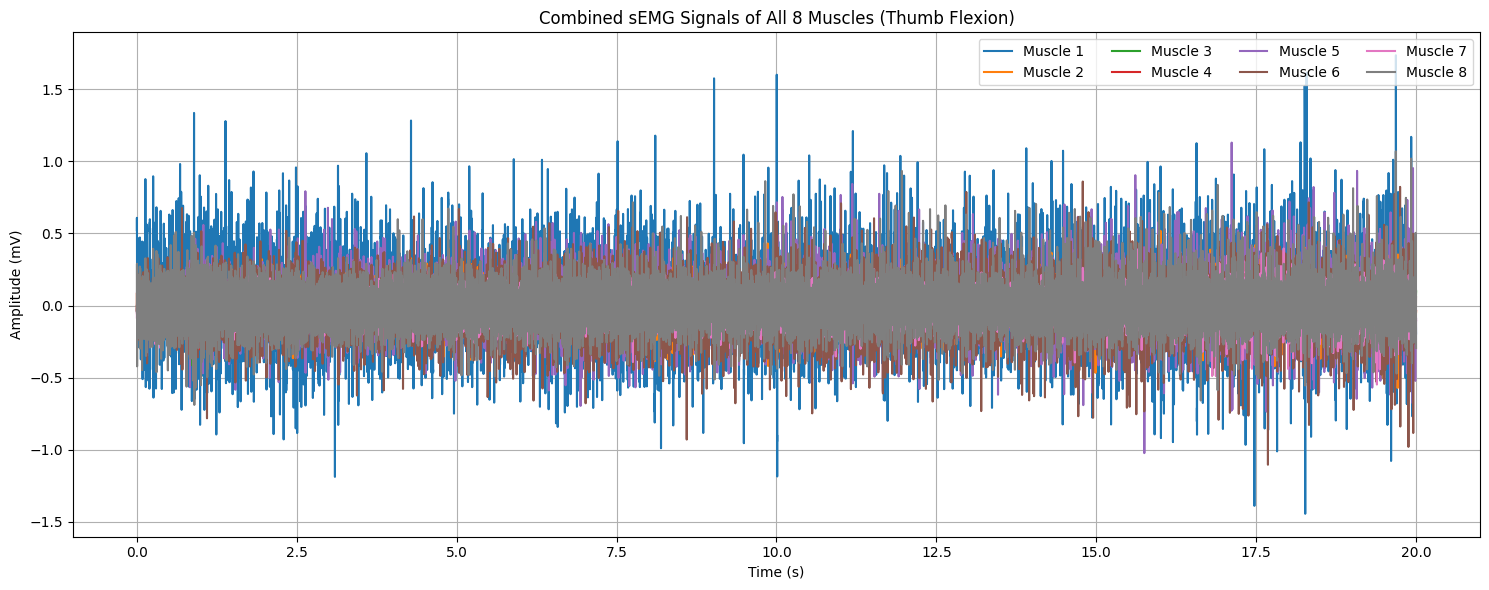

In [9]:
# --- Time Axis ---
time = np.linspace(0,20, n_samples)

# === Figure 1: Combined sEMG Signals ===
plt.figure(figsize=(15, 6))
for i in range(8):
    plt.plot(time, dt.iloc[:, i]*1000, label=muscle_labels[i])
plt.title("Combined sEMG Signals of All 8 Muscles (Thumb Flexion)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.legend(loc='upper right', ncol=4)
plt.grid(True)
plt.tight_layout()
plt.savefig("Fig3.2_combined_sEMG.png", dpi=300)
plt.show()

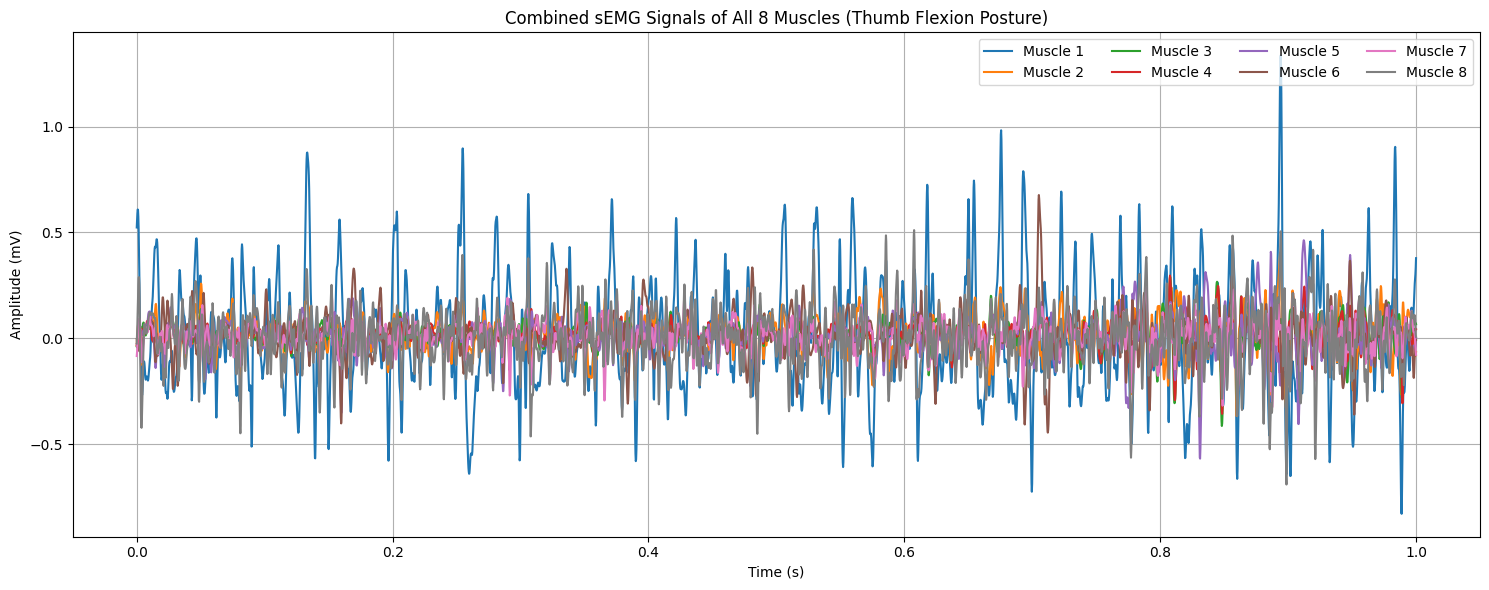

In [10]:
# --- Time Axis ---
time = np.linspace(0,1, 4000)

# === Figure 1: Combined sEMG Signals ===
plt.figure(figsize=(15, 6))
for i in range(8):
    plt.plot(time, dt.iloc[:4000, i]*1000, label=muscle_labels[i])
plt.title("Combined sEMG Signals of All 8 Muscles (Thumb Flexion Posture)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.legend(loc='upper right', ncol=4)
plt.grid(True)
plt.tight_layout()
plt.savefig("Fig3.3_combined_sEMG_zoomed.png", dpi=300)
plt.show()

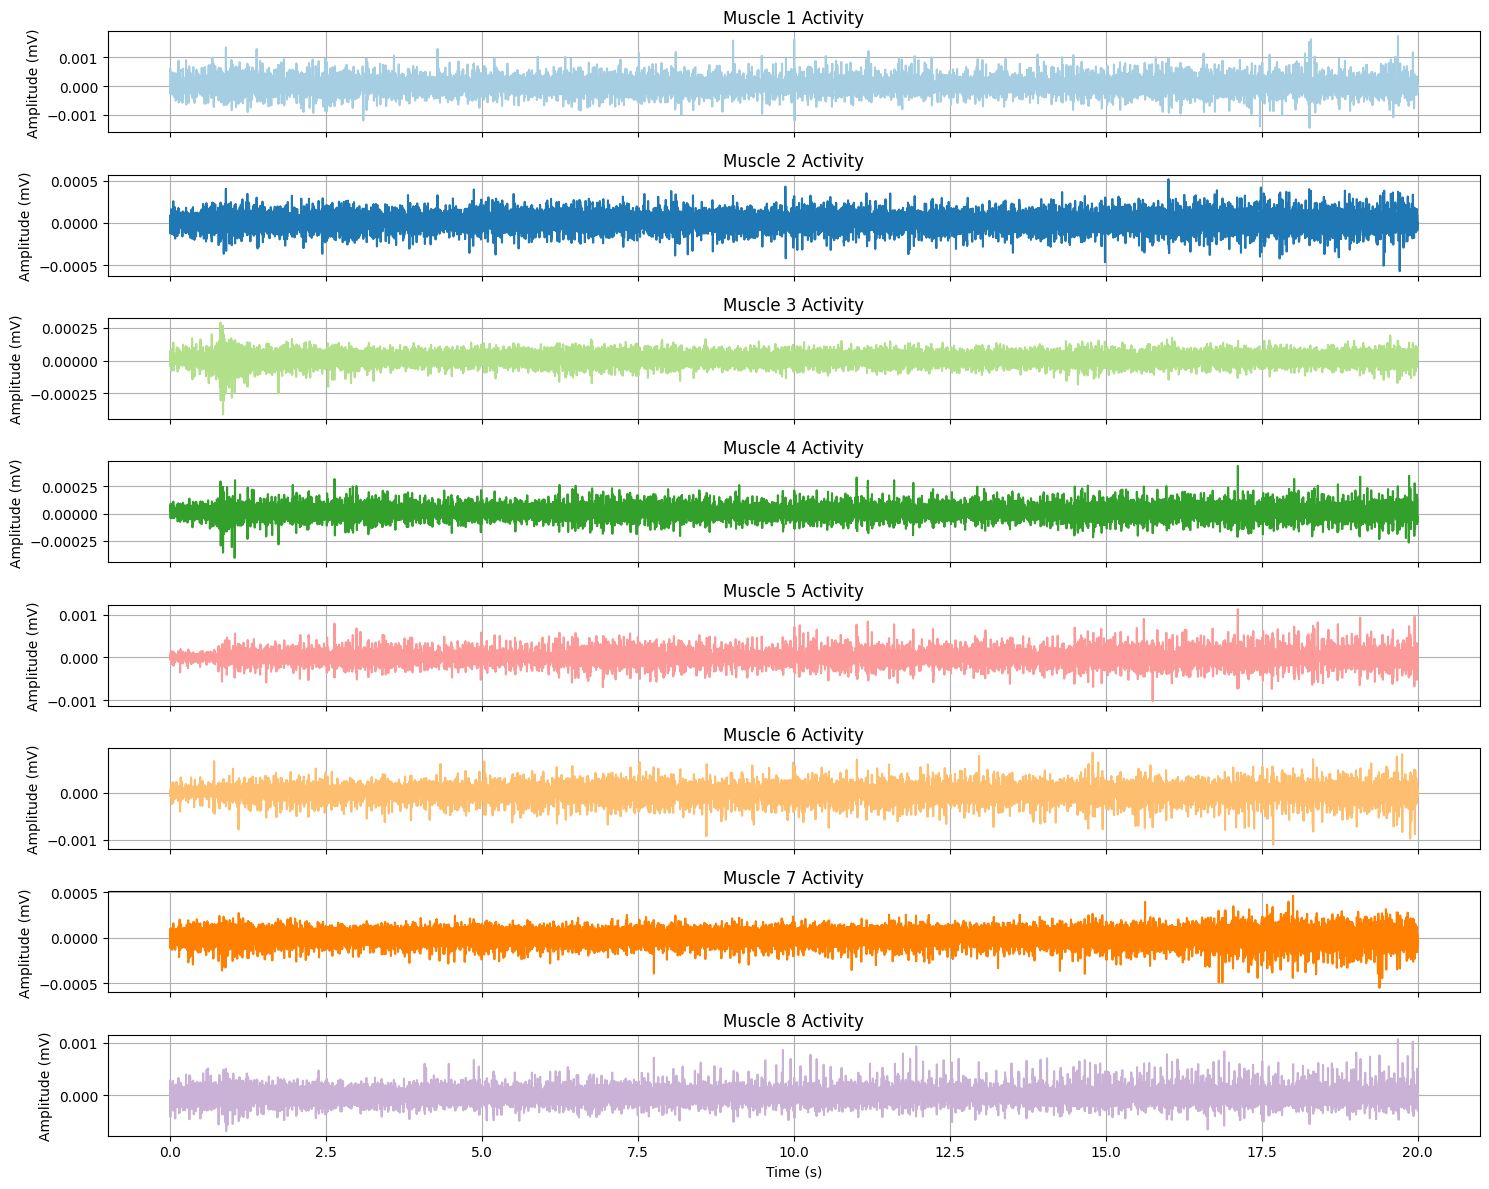

In [11]:
# === Figure 2: Individual Muscle Activity ===
time = np.linspace(0,20, n_samples)
fig1, axs1 = plt.subplots(8, 1, figsize=(15, 12), sharex=True)
for i in range(8):
    axs1[i].plot(time, dt.iloc[:, i],color = plt.cm.Paired(i/10.))
    axs1[i].set_title(f'{muscle_labels[i]} Activity')
    axs1[i].set_ylabel('Amplitude (mV)')
    axs1[i].grid(True)
axs1[-1].set_xlabel('Time (s)')
plt.tight_layout()
fig1.savefig("Fig3.4_individual_muscles.png", dpi=300)
plt.show()

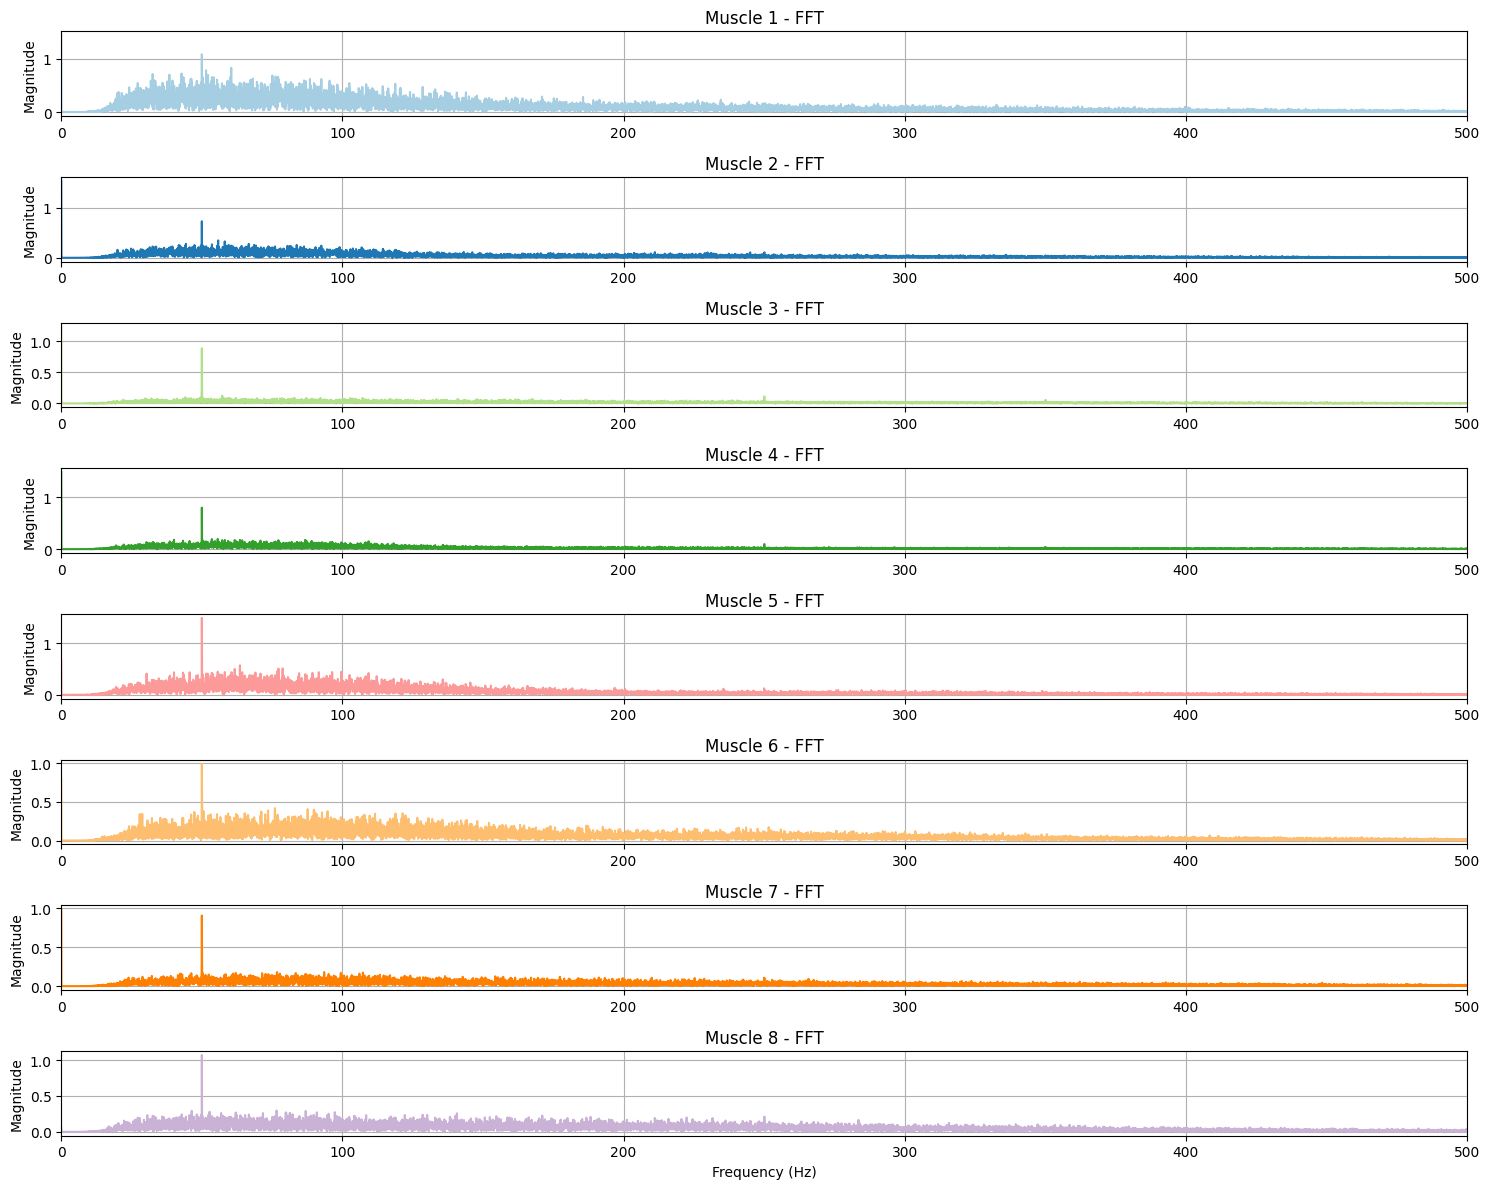

In [12]:
# === Figure 3: FFT of Each Muscle Signal ===
fig2, axs2 = plt.subplots(8, 1, figsize=(15, 12))
for i in range(8):
    signal = dt.iloc[:, i].values
    yf = np.abs(fft(signal))[:n_samples // 2]
    xf = fftfreq(n_samples, 1 / fs)[:n_samples // 2]

    axs2[i].plot(xf, yf,color = plt.cm.Paired(i/10.))
    axs2[i].set_title(f'{muscle_labels[i]} - FFT')
    axs2[i].set_xlim([0, 500])  # Focus on typical EMG bandwidth
    axs2[i].set_ylabel('Magnitude')
    axs2[i].grid(True)
axs2[-1].set_xlabel('Frequency (Hz)')
plt.tight_layout()
fig2.savefig("Fig3.5_fft_per_muscle.png", dpi=300)
plt.show()

### Processing the signals

In [14]:
fs = 4000  # Sampling frequency
lowcut = 20
highcut = 450
notch_freq = 50
quality_factor = 80.0  # Q-factor for the notch filter

In [15]:
def bandpass_filter(signal, lowcut=20, highcut=450, fs=4000, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

def notch_filter(signal, notch_freq=50, fs=4000, quality_factor=80):
    b, a = iirnotch(notch_freq / (0.5 * fs), quality_factor)
    return filtfilt(b, a, signal)


In [16]:
def fw_rectify(signal):
    rectified = np.abs(signal)

In [17]:
def process_emg(signal, fs=4000):
    signal = bandpass_filter(signal, fs=fs)
    signal = notch_filter(signal, fs=fs)
    # signal = fw_rectify(signal)

    return signal

---

In [18]:
processed_df = pd.DataFrame()

for channel in dt.columns:
    raw_signal = data[channel].values
    processed_df[channel] = process_emg(raw_signal)

In [19]:
a = processed_df
a

,M1,M2,M3,M4,M5,M6,M7,M8
0,-0.000007,-0.000036,-3.566545e-05,-0.000068,-0.000182,-0.000216,-0.000992,-0.000303
1,0.000114,-0.000003,-1.540563e-05,-0.000084,-0.000166,-0.000172,-0.001426,-0.000081
2,0.000220,0.000026,-3.623098e-07,-0.000105,-0.000167,-0.000117,-0.001839,0.000112
3,0.000295,0.000046,5.112093e-06,-0.000136,-0.000198,-0.000043,-0.002214,0.000252
4,0.000324,0.000050,-1.634462e-06,-0.000178,-0.000266,0.000047,-0.002536,0.000321
...,...,...,...,...,...,...,...,...
79995,0.000049,0.000092,4.550378e-05,-0.000002,0.000121,0.000026,0.000001,-0.000269
79996,0.000050,0.000095,4.659589e-05,0.000011,0.000088,0.000030,-0.000088,-0.000124
79997,0.000040,0.000092,4.138982e-05,0.000017,0.000060,0.000025,-0.000125,-0.000039
79998,0.000022,0.000079,3.020477e-05,0.000016,0.000041,0.000015,-0.000106,-0.000013


---

In [20]:
# --- Parameters ---
fs = 4000  # Sampling frequency in Hz
duration = 20  # Duration in seconds
n_samples = fs * duration  # Should be 80000

new_data = processed_df
muscle_labels = [f'Muscle {i+1}' for i in range(data.shape[1])]

# --- Time Axis ---
time = np.linspace(0, duration, n_samples)

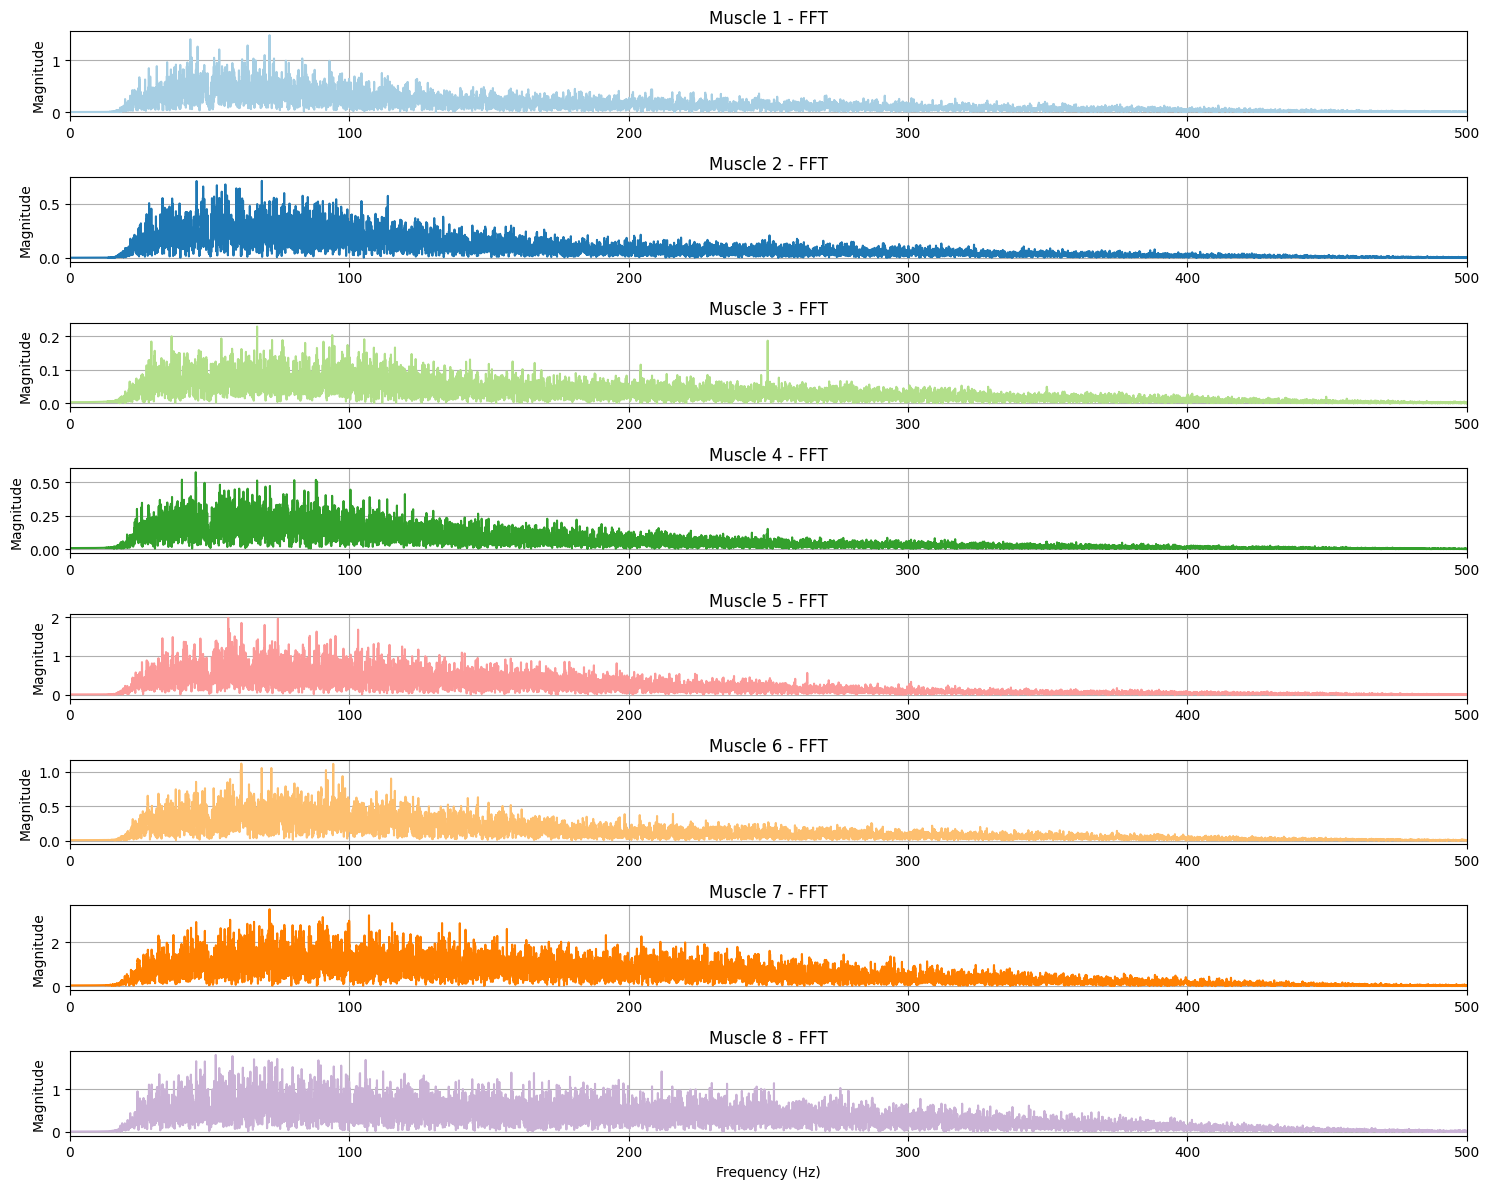

In [21]:
fig2, axs2 = plt.subplots(8, 1, figsize=(15, 12))
for i in range(8):
    signal = new_data.iloc[:, i].values
    yf = np.abs(fft(signal))[:n_samples // 2]
    xf = fftfreq(n_samples, 1 / fs)[:n_samples // 2]

    axs2[i].plot(xf, yf,color = plt.cm.Paired(i/10.))
    axs2[i].set_title(f'{muscle_labels[i]} - FFT')
    axs2[i].set_xlim([0, 500])  # Focus on typical EMG bandwidth
    axs2[i].set_ylabel('Magnitude')
    axs2[i].grid(True)
axs2[-1].set_xlabel('Frequency (Hz)')
plt.tight_layout()
fig2.savefig("processed_fft_per_muscle.png", dpi=300)
plt.show()

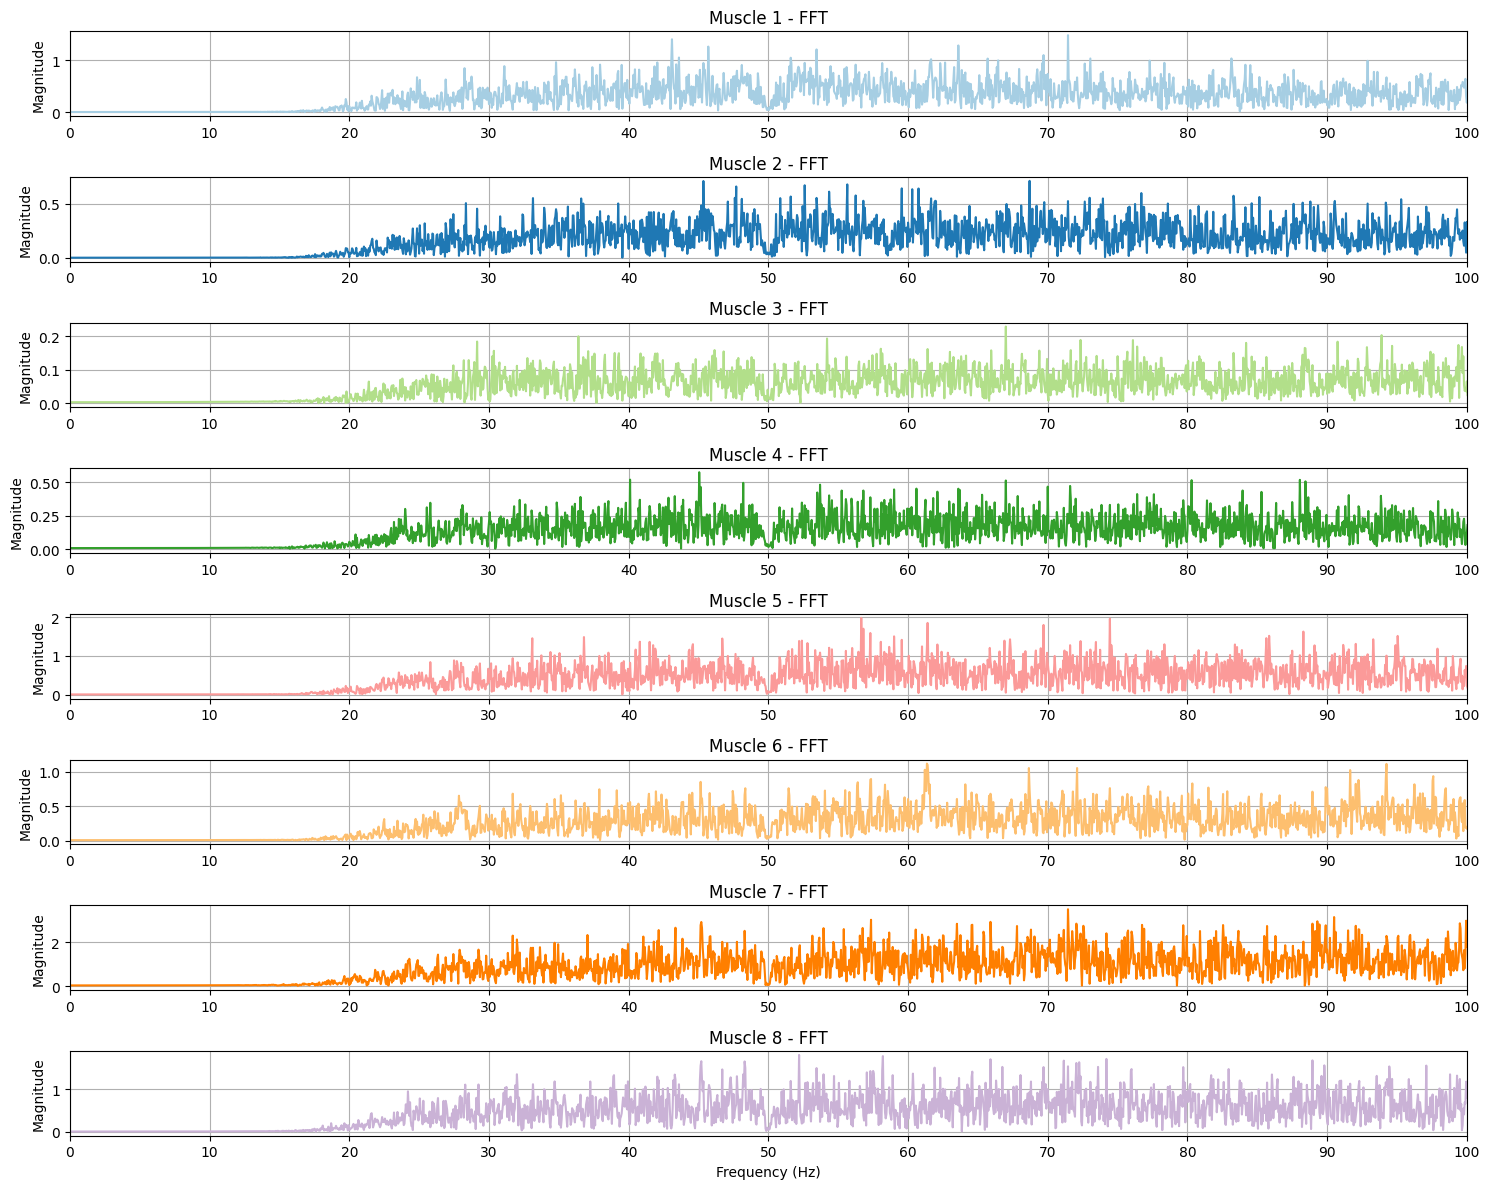

In [23]:
fig2, axs2 = plt.subplots(8, 1, figsize=(15, 12))
for i in range(8):
    signal = new_data.iloc[:, i].values
    yf = np.abs(fft(signal))[:n_samples // 2]
    xf = fftfreq(n_samples, 1 / fs)[:n_samples // 2]

    axs2[i].plot(xf, yf,color = plt.cm.Paired(i/10.))
    axs2[i].set_title(f'{muscle_labels[i]} - FFT')
    axs2[i].set_xlim([0, 100])  # Focus on typical EMG bandwidth
    axs2[i].set_xticks(np.arange(0, 110, 10))  # Set x-axis ticks from 0 to 100 in steps of 10
    axs2[i].set_ylabel('Magnitude')
    axs2[i].grid(True)

axs2[-1].set_xlabel('Frequency (Hz)')
plt.tight_layout()
fig2.savefig("processed_fft_per_muscle_ZOOM.png", dpi=300)
plt.show()

## Processing all the emg signals

In [21]:
def preprocess_all_emg_signals(subject_trial_dict):
    processed_dict = {}
    for key, df in subject_trial_dict.items():
        processed_df = df.copy()
        for col in df.columns:
            processed_df[col] = process_emg(df[col].values)
        processed_dict[key] = processed_df
    return processed_dict

In [22]:
Processed_SPT = preprocess_all_emg_signals(Sub_Pos_Trial)

In [23]:
def extract_sort_key(key, movement_classes):
    parts = key
    subject_num = int(parts[1])  # 'S1' -> 1
    movement = (parts[3:6]) 
    trial = int(parts[-1])  # e.g., '1'
    movement_order = movement_classes.get(movement, 999)
    return (subject_num, movement_order,trial)  # <--- TRIAL comes before movement

sorted_keys = sorted(
    Processed_SPT.keys(),
    key=lambda k: extract_sort_key(k, MovementClasses)
)

Sorted_Processed_SPT = {
    key: Processed_SPT[key] for key in sorted_keys
}

## Trimming the data upto 5 secs for analysis.

In [24]:
# Sampling rate and duration
sampling_rate = 4000  # Hz
duration_seconds = 5
num_samples = sampling_rate * duration_seconds  # 20000

# Trimming the dataframes
Trimmed_SPT = {}  # Create a new dictionary to store trimmed data
for key, df in Sorted_Processed_SPT.items():
    trimmed_df = df.iloc[:num_samples, :]  # Keep first 20000 rows (all columns)
    Trimmed_SPT[key] = trimmed_df

In [25]:
joblib.dump(Trimmed_SPT, 'Trimmed_SPT.joblib')

['Trimmed_SPT.joblib']

I want to organise the data according to subjects, So I might want a dictionary that will contain all the info according to subjects.

In [26]:
Trimmed_SPT.keys()

dict_keys(['S1_T_T1', 'S1_T_T2', 'S1_T_T3', 'S1_I_I1', 'S1_I_I2', 'S1_I_I3', 'S1_M_M1', 'S1_M_M2', 'S1_M_M3', 'S1_R_R1', 'S1_R_R2', 'S1_R_R3', 'S1_L_L1', 'S1_L_L2', 'S1_L_L3', 'S1_T_I1', 'S1_T_I2', 'S1_T_I3', 'S1_T_M1', 'S1_T_M2', 'S1_T_M3', 'S1_T_R1', 'S1_T_R2', 'S1_T_R3', 'S1_T_L1', 'S1_T_L2', 'S1_T_L3', 'S1_I_M1', 'S1_I_M2', 'S1_I_M3', 'S1_M_R1', 'S1_M_R2', 'S1_M_R3', 'S1_R_L1', 'S1_R_L2', 'S1_R_L3', 'S1_IMR1', 'S1_IMR2', 'S1_IMR3', 'S1_MRL1', 'S1_MRL2', 'S1_MRL3', 'S1_HC_1', 'S1_HC_2', 'S1_HC_3', 'S2_T_T1', 'S2_T_T2', 'S2_T_T3', 'S2_I_I1', 'S2_I_I2', 'S2_I_I3', 'S2_M_M1', 'S2_M_M2', 'S2_M_M3', 'S2_R_R1', 'S2_R_R2', 'S2_R_R3', 'S2_L_L1', 'S2_L_L2', 'S2_L_L3', 'S2_T_I1', 'S2_T_I2', 'S2_T_I3', 'S2_T_M1', 'S2_T_M2', 'S2_T_M3', 'S2_T_R1', 'S2_T_R2', 'S2_T_R3', 'S2_T_L1', 'S2_T_L2', 'S2_T_L3', 'S2_I_M1', 'S2_I_M2', 'S2_I_M3', 'S2_M_R1', 'S2_M_R2', 'S2_M_R3', 'S2_R_L1', 'S2_R_L2', 'S2_R_L3', 'S2_IMR1', 'S2_IMR2', 'S2_IMR3', 'S2_MRL1', 'S2_MRL2', 'S2_MRL3', 'S2_HC_1', 'S2_HC_2', 'S2_HC_3',

In [27]:
Trimmed_SPT['S1_T_T1']

,M1,M2,M3,M4,M5,M6,M7,M8
0,-0.000041,0.000003,6.744678e-06,0.000006,2.632800e-05,0.000010,0.000012,0.000008
1,0.000015,0.000029,3.632403e-06,0.000005,2.075861e-05,0.000002,0.000039,0.000055
2,0.000061,0.000054,1.429145e-06,0.000005,1.464998e-05,-0.000007,0.000067,0.000107
3,0.000089,0.000076,8.308711e-07,0.000005,7.860188e-06,-0.000016,0.000094,0.000165
4,0.000092,0.000094,2.153409e-06,0.000006,7.713958e-07,-0.000027,0.000121,0.000225
...,...,...,...,...,...,...,...,...
19995,-0.000258,-0.000023,-1.644603e-05,-0.000081,-2.655559e-04,-0.000087,0.000156,0.000134
19996,-0.000254,-0.000035,-2.578935e-05,-0.000087,-2.942933e-04,-0.000089,0.000157,0.000140
19997,-0.000241,-0.000047,-2.993663e-05,-0.000085,-3.148110e-04,-0.000070,0.000157,0.000138
19998,-0.000219,-0.000055,-2.733978e-05,-0.000075,-3.213130e-04,-0.000033,0.000155,0.000131


---

### Creating a feature extractor of a signal.

In [28]:
class sEMGFeatureExtractor:
    """
    Extract 18 time-domain features from sEMG signals based on standard formulas.
    """
    
    def __init__(self, signal):
        """
        Initialize with sEMG signal data.
        
        Parameters:
        signal (array-like): Input sEMG signal
        """
        self.signal = np.array(signal)
        self.N = len(self.signal)
        
    def mean_absolute_value(self):
        """Mean Absolute Value (MAV)"""
        return (1/self.N) * np.sum(np.abs(self.signal))
    
    def variance(self):
        """Variance (VAR)"""
        mu = np.mean(self.signal)
        return np.sqrt((1/(self.N-1)) * np.sum((self.signal - mu)**2))
    
    def standard_deviation(self):
        """Standard Deviation (STD)"""
        mu = np.mean(self.signal)
        return np.sqrt((1/(self.N-1)) * np.sum((self.signal - mu)**2))
    
    def minimum_amplitude(self):
        """Minimum Amplitude (MA)"""
        return np.min(self.signal)
    
    def maximum_amplitude(self):
        """Maximum Amplitude (MxA)"""
        return np.max(self.signal)
    
    def peak_to_peak(self):
        """Peak to Peak (PTP)"""
        return np.max(self.signal) - np.min(self.signal)
    
    def root_mean_square(self):
        """Root Mean Square (RMS)"""
        return np.sqrt((1/self.N) * np.sum(self.signal**2))
    
    def sum_absolute_difference(self):
        """Sum of Absolute Difference (SAM)"""
        if self.N <= 1:
            return 0
        return np.sum(np.abs(self.signal[1:] - self.signal[:-1]))
    
    def skewness(self):
        """Skewness (G1)"""
        mu = np.mean(self.signal)
        
        # Calculate m2 and m3
        m2 = (1/self.N) * np.sum((self.signal - mu)**2)
        m3 = (1/self.N) * np.sum((self.signal - mu)**3)
        
        if m2 == 0:
            return 0
        
        return m3 / (m2**(3/2))
    
    def kurtosis(self):
        """Kurtosis (G2)"""
        mu = np.mean(self.signal)
        
        # Calculate m2 and m4
        m2 = (1/self.N) * np.sum((self.signal - mu)**2)
        m4 = (1/self.N) * np.sum((self.signal - mu)**4)
        
        if m2 == 0:
            return 0
        
        return m4 / (m2**2)
    
    def zero_crossing(self):
        """Zero Crossing (ZC)"""
        def sign_func(x):
            return 1 if x >= 0 else 0
        
        zc_count = 0
        for i in range(self.N - 1):
            if (sign_func(self.signal[i] * self.signal[i+1]) == 0 and 
                abs(self.signal[i] - self.signal[i+1]) >= 0):  # threshold can be adjusted
                zc_count += 1
        
        return zc_count
    
    def energy(self):
        """Energy (Ene)"""
        return (1/self.N) * np.sum(self.signal**2)
    
    def hjorth_parameter_activity(self):
        """Hjorth Parameter Activity (HPA)"""
        mu = np.mean(self.signal)
        return (1/self.N) * np.sum((self.signal - mu)**2)
    
    def inter_quartile_range(self):
        """Inter Quartile Range (IQR)"""
        # Calculate quartiles
        q1 = np.percentile(self.signal, 25)  # LQ = (1/4)((N+1)th term)
        q3 = np.percentile(self.signal, 75)  # UQ = (3/4)((N+1)th term)
        
        return q3 - q1
    
    def slope_sign_change(self):
        """Slope Sign Change (SSC)"""
        def f_func(x):
            return 1 if x >= 0 else 0
        
        ssc_count = 0
        for i in range(1, self.N - 1):
            condition1 = (self.signal[i] - self.signal[i-1]) * (self.signal[i] - self.signal[i+1])
            if f_func(condition1) == 1:
                ssc_count += 1
        
        return ssc_count
    
    def willison_amplitude(self, threshold=0.01):
        """Willison Amplitude (WAMP)"""
        def f_func(x, thresh):
            return 1 if x >= thresh else 0
        
        wamp_count = 0
        for i in range(self.N - 1):
            if f_func(abs(self.signal[i] - self.signal[i+1]), threshold) == 1:
                wamp_count += 1
        
        return wamp_count
    
    def extract_all_features(self, wamp_threshold=0.01):
        """
        Extract all 18 features from the sEMG signal.
        
        Parameters:
        wamp_threshold (float): Threshold for Willison Amplitude calculation
        
        Returns:
        dict: Dictionary containing all 18 features
        """
        features = {
            'MAV': self.mean_absolute_value(),
            'VAR': self.variance(),
            'STD': self.standard_deviation(),
            'MA': self.minimum_amplitude(),
            'MxA': self.maximum_amplitude(),
            'PTP': self.peak_to_peak(),
            'RMS': self.root_mean_square(),
            'SAM': self.sum_absolute_difference(),
            'Skewness': self.skewness(),
            'Kurtosis': self.kurtosis(),
            'ZC': self.zero_crossing(),
            'Energy': self.energy(),
            'HPA': self.hjorth_parameter_activity(),
            'IQR': self.inter_quartile_range(),
            'SSC': self.slope_sign_change(),
            'WAMP': self.willison_amplitude(wamp_threshold)
        }
        
        return features

In [29]:
import numpy as np

def extract_features_from_all_windows(Trimmed_SPT, window_ms=128, step_ms=64, fs=4000):
    """
    Extracts windowed features from Trimmed_SPT dictionary.

    Parameters:
        Trimmed_SPT (dict): Dictionary with 360 keys, each key mapping to (20000 x 8) EMG data.
        window_ms (int): Window duration in milliseconds.
        step_ms (int): Step size in milliseconds.
        fs (int): Sampling frequency in Hz.
    
    Returns:
        dict: New dictionary mapping each key to a 2D feature matrix 
    """
    window_size = int((window_ms / 1000) * fs)  
    step_size = int((step_ms / 1000) * fs)      
    
    Features_SPT = {}

    for key, data in Trimmed_SPT.items():
        n_samples, n_channels = data.shape
        feature_matrix = []

        for start in range(0, n_samples - window_size + 1, step_size):
            end = start + window_size
            window_features = []

            for ch in range(n_channels):
                signal_window = data.iloc[start:end, ch]
                extractor = sEMGFeatureExtractor(signal_window)
                features = extractor.extract_all_features()
                channel_feature_vector = list(features.values())  # 16 features
                window_features.extend(channel_feature_vector)   # Concatenate for 8 channels
            
            feature_matrix.append(window_features)  # One row per window

        Features_SPT[key] = np.array(feature_matrix)  # shape: [num_windows x 128]

    return Features_SPT

In [30]:
Features_SPT = extract_features_from_all_windows(Trimmed_SPT)

In [31]:
joblib.dump(Features_SPT, 'Features_SPT.joblib')

['Features_SPT.joblib']

In [32]:
Features_SPT['S1_HC_1'].shape

(77, 128)